In [94]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle
import math

In [95]:
path = "../../../outputs/cr_investigations/multi_var_hists/cambridge04_averaged.pkl"
with open(path, 'rb') as f:
    cring = pickle.load(f)

In [96]:
hgg = cring[0]['Hgg']['Hgg']
hbb = cring[0]['Hbb']['Hbb']

In [97]:
#signal scale factors
scalesHJ = ((44.99*(0.471*1000)*0.0817)/(hgg['entries']))
scalesHbb = ((44.99*(0.274*1000)*0.581)/(hbb['entries']))

In [98]:
#do the scaling 
hgg_entries = list(hgg.keys())
for i in range(1, len(hgg_entries)):
    hgg[hgg_entries[i]].view(flow=True)[:] *= scalesHJ

hbb_entries = list(hgg.keys())
for i in range(1, len(hbb_entries)):
    hbb[hbb_entries[i]].view(flow=True)[:] *= scalesHbb

In [99]:
l = 0
m = 40
hgg['Color_Ring'] = hgg['Color_Ring'][l:m,4:,:,:]
hbb['Color_Ring'] = hbb['Color_Ring'][l:m,4:,:,:]

In [100]:
#get the totals for each histogram
hgg_totals_dict = {}
for i in range(1, len(hgg_entries)):
    if len(hgg[hgg_entries[i]].axes) == 1:
        hgg_totals_dict[hgg_entries[i]] = hgg[hgg_entries[i]][0:len(hgg[hgg_entries[i]].view()):sum]
    else:
        for j in hgg[hgg_entries[i]].axes.name:
            hgg_totals_dict[j] = hgg[hgg_entries[i]].project(j)[0:len(hgg[hgg_entries[i]].project(j).view()):sum]   
        
hbb_totals_dict = {}
for i in range(1, len(hbb_entries)):
    if len(hbb[hbb_entries[i]].axes) == 1:
        hbb_totals_dict[hbb_entries[i]] = hbb[hbb_entries[i]][0:len(hbb[hbb_entries[i]].view()):sum]
    else:
        for j in hbb[hbb_entries[i]].axes.name:
            hbb_totals_dict[j] = hbb[hbb_entries[i]].project(j)[0:len(hbb[hbb_entries[i]].project(j).view()):sum]

In [101]:
#get the true positive fractions
hgg_truth_dict = {}
for i in range(1, len(hgg_entries)):
    if len(hgg[hgg_entries[i]].axes) == 1:
        temp_list = []
        for j in range(1, len(hgg[hgg_entries[i]].view())+1):
            temp_list.append(hgg[hgg_entries[i]][0:j:sum].value/hgg_totals_dict[hgg_entries[i]].value)
        hgg_truth_dict[hgg_entries[i]] = temp_list
    else:
        for j in hgg[hgg_entries[i]].axes.name:
            temp_list = []
            for k in range(1, len(hgg[hgg_entries[i]].project(j).view())+1):
                temp_list.append(hgg[hgg_entries[i]].project(j)[0:k:sum].value/hgg_totals_dict[hgg_entries[i]].value)
            hgg_truth_dict[j] = temp_list
                
hbb_truth_dict = {}
for i in range(1, len(hbb_entries)):
    if len(hbb[hbb_entries[i]].axes) == 1:
        temp_list = []
        for j in range(1, len(hbb[hbb_entries[i]].view())+1):
            temp_list.append(hbb[hbb_entries[i]][0:j:sum].value/hbb_totals_dict[hbb_entries[i]].value)
        hbb_truth_dict[hbb_entries[i]] = temp_list
    else:
        for j in hbb[hbb_entries[i]].axes.name:
            temp_list = []
            for k in range(1, len(hbb[hbb_entries[i]].project(j).view())+1):
                temp_list.append(hbb[hbb_entries[i]].project(j)[0:k:sum].value/hbb_totals_dict[hbb_entries[i]].value)
            hbb_truth_dict[j] = temp_list

In [102]:
#get the true positive fractions backwards
hgg_truth_dict_back = {}
for i in range(1, len(hgg_entries)):
    if len(hgg[hgg_entries[i]].axes) == 1:
        temp_list = []
        for j in range(1, len(hgg[hgg_entries[i]].view())+1):
            temp_list.append(hgg[hgg_entries[i]][len(hgg[hgg_entries[i]].view())-j:len(hgg[hgg_entries[i]].view()):sum].value/hgg_totals_dict[hgg_entries[i]].value)
        hgg_truth_dict_back[hgg_entries[i]] = temp_list
    else:
        for j in hgg[hgg_entries[i]].axes.name:
            temp_list = []
            for k in range(1, len(hgg[hgg_entries[i]].project(j).view())+1):
                temp_list.append(hgg[hgg_entries[i]].project(j)[len(hgg[hgg_entries[i]].project(j).view())-k:len(hgg[hgg_entries[i]].project(j).view()):sum].value/hgg_totals_dict[hgg_entries[i]].value)
            hgg_truth_dict_back[j] = temp_list
                
hbb_truth_dict_back = {}
for i in range(1, len(hbb_entries)):
    if len(hbb[hbb_entries[i]].axes) == 1:
        temp_list = []
        for j in range(1, len(hbb[hbb_entries[i]].view())+1):
            temp_list.append(hbb[hbb_entries[i]][len(hbb[hbb_entries[i]].view())-j:len(hbb[hbb_entries[i]].view()):sum].value/hbb_totals_dict[hbb_entries[i]].value)
        hbb_truth_dict_back[hbb_entries[i]] = temp_list
    else:
        for j in hbb[hbb_entries[i]].axes.name:
            temp_list = []
            for k in range(1, len(hbb[hbb_entries[i]].project(j).view())+1):
                temp_list.append(hbb[hbb_entries[i]].project(j)[len(hbb[hbb_entries[i]].project(j).view())-k:len(hbb[hbb_entries[i]].project(j).view()):sum].value/hbb_totals_dict[hbb_entries[i]].value)
            hbb_truth_dict_back[j] = temp_list

In [103]:
#2017 integrated luminosity and QCD cross sections
IL = 44.99
xs_170to300 = 103700
xs_300to470 = 6835
xs_470to600 = 549.5
xs_600to800 = 156.5
xs_800to1000 = 26.22
xs_1000to1400 = 7.475
xs_1400to1800 = 0.6482
xs_1800to2400 = 0.08742
xs_2400to3200 = 0.005237
xs_3200toInf = 0.0001353

In [104]:
#combine the qcds into a dictionary
qcd_dict = {}
qcd_dict['q173'] = cring[0]['QCD_Pt_170to300_TuneCP5_13TeV_pythia8']['QCD_Pt_170to300']
qcd_dict['q347'] = cring[0]['QCD_Pt_300to470_TuneCP5_13TeV_pythia8']['QCD_Pt_300to470']
qcd_dict['q476'] = cring[0]['QCD_Pt_470to600_TuneCP5_13TeV_pythia8']['QCD_Pt_470to600']
qcd_dict['q68'] = cring[0]['QCD_Pt_600to800_TuneCP5_13TeV_pythia8']['QCD_Pt_600to800']
qcd_dict['q810'] = cring[0]['QCD_Pt_800to1000_TuneCP5_13TeV_pythia8']['QCD_Pt_800to1000']
qcd_dict['q1014'] = cring[0]['QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8']['QCD_Pt_1000to1400']
qcd_dict['q1418'] = cring[0]['QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8']['QCD_Pt_1400to1800']
qcd_dict['q1824'] = cring[0]['QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8']['QCD_Pt_1800to2400']
qcd_dict['q2432'] = cring[0]['QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8']['QCD_Pt_2400to3200']
qcd_dict['q32inf'] = cring[0]['QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8']['QCD_Pt_3200toInf']

In [105]:
#QCD scale factors dictionary
qcd_sf_dict = {}
qcd_sf_dict['scales170to300'] = (((xs_170to300*1000)*IL)/(qcd_dict['q173']['entries']))
qcd_sf_dict['scales300to470'] = (((xs_300to470*1000)*IL)/(qcd_dict['q347']['entries']))
qcd_sf_dict['scales470to600'] = (((xs_470to600*1000)*IL)/(qcd_dict['q476']['entries']))
qcd_sf_dict['scales600to800'] = (((xs_600to800*1000)*IL)/(qcd_dict['q68']['entries']))
qcd_sf_dict['scales800to1000'] = (((xs_800to1000*1000)*IL)/(qcd_dict['q810']['entries']))
qcd_sf_dict['scales1000to1400'] = (((xs_1000to1400*1000)*IL)/(qcd_dict['q1014']['entries']))
qcd_sf_dict['scales1400to1800'] = (((xs_1400to1800*1000)*IL)/(qcd_dict['q1418']['entries']))
qcd_sf_dict['scales1800to2400'] = (((xs_1800to2400*1000)*IL)/(qcd_dict['q1824']['entries']))
qcd_sf_dict['scales2400to3200'] = (((xs_2400to3200*1000)*IL)/(qcd_dict['q2432']['entries']))
qcd_sf_dict['scales3200toInf'] = (((xs_3200toInf*1000)*IL)/(qcd_dict['q32inf']['entries']))

In [106]:
#scale all the qcd values
entries = list(qcd_dict['q173'].keys())
for i in range(0, len(qcd_dict)):
    qcd_range = list(qcd_dict.keys())[i]
    qcd_scales = list(qcd_sf_dict.keys())[i]
    for j in range(1, len(entries)):
        qcd_dict[qcd_range][entries[j]].view(flow=True)[:] *= qcd_sf_dict[qcd_scales]

In [107]:
#combine the qcds into individual variable fields
qcd_vars = {}
for i in range(1, len(entries)):
    temp_hist = qcd_dict['q173'][entries[i]]
    for j in range(1, len(qcd_dict)):
        temp_hist += qcd_dict[list(qcd_dict.keys())[j]][entries[i]]
    qcd_vars[entries[i]] = temp_hist

In [108]:
qcd_vars['Color_Ring'] = qcd_vars['Color_Ring'][l:m,4:,:,:]

In [109]:
#totals for each qcd hist
qcd_totals_dict = {}
for i in range(1, len(entries)):
    if len(qcd_vars[entries[i]].axes) == 1:
        qcd_totals_dict[entries[i]] = qcd_vars[entries[i]][0:len(qcd_vars[entries[i]].view()):sum]
    else:
        for j in qcd_vars[entries[i]].axes.name:
            qcd_totals_dict[j] = qcd_vars[entries[i]].project(j)[0:len(qcd_vars[entries[i]].project(j).view()):sum]

In [110]:
#false positive fractions for each qcd variable
qcd_false_positive_dict = {}
for i in range(1, len(entries)):
    if len(qcd_vars[entries[i]].axes) == 1:
        temp_list = []
        for j in range(1, len(qcd_vars[entries[i]].view())+1):
            temp_list.append(qcd_vars[entries[i]][0:j:sum].value/qcd_totals_dict[entries[i]].value)
        qcd_false_positive_dict[entries[i]] = temp_list
    else:
        for j in qcd_vars[entries[i]].axes.name:
            temp_list = []
            for k in range(1, len(qcd_vars[entries[i]].project(j).view())+1):
                temp_list.append(qcd_vars[entries[i]].project(j)[0:k:sum].value/qcd_totals_dict[entries[i]].value)
            qcd_false_positive_dict[j] = temp_list

In [111]:
#false positive fractions backwards for each qcd variable
qcd_false_positive_dict_back = {}
for i in range(1, len(entries)):
    if len(qcd_vars[entries[i]].axes) == 1:
        temp_list = []
        for j in range(1, len(qcd_vars[entries[i]].view())+1):
            temp_list.append(qcd_vars[entries[i]][len(qcd_vars[entries[i]].view())-j:len(qcd_vars[entries[i]].view()):sum].value/qcd_totals_dict[entries[i]].value)
        qcd_false_positive_dict_back[entries[i]] = temp_list
    else:
        for j in qcd_vars[entries[i]].axes.name:
            temp_list = []
            for k in range(1, len(qcd_vars[entries[i]].project(j).view())+1):
                temp_list.append(qcd_vars[entries[i]].project(j)[len(qcd_vars[entries[i]].project(j).view())-k:len(qcd_vars[entries[i]].project(j).view()):sum].value/qcd_totals_dict[entries[i]].value)
            qcd_false_positive_dict_back[j] = temp_list

In [112]:
#make the s over root b dict for hgg forward
hgg_s_over_rb_dict_for = {}
for i in range(1, len(hgg_entries)):
    if len(hgg[hgg_entries[i]].axes) == 1:
        temp_list = []
        for j in range(1, len(hgg[hgg_entries[i]].view())+1):
            try:
                temp_list.append(hgg[hgg_entries[i]][0:j:sum].value/math.sqrt(qcd_vars[hgg_entries[i]][0:j:sum].value))
            except:
                continue
            hgg_s_over_rb_dict_for[hgg_entries[i]] = temp_list
    else:
        for j in hgg[hgg_entries[i]].axes.name:
            temp_list = []
            for k in range(1, len(hgg[hgg_entries[i]].project(j).view())+1):
                try:
                    temp_list.append(hgg[hgg_entries[i]].project(j)[0:k:sum].value/math.sqrt(qcd_vars[hgg_entries[i]].project(j)[0:k:sum].value))
                except:
                    continue
            hgg_s_over_rb_dict_for[j] = temp_list

#make the s over root b dict for hgg backward
hgg_s_over_rb_dict_back = {}
for i in range(1, len(hgg_entries)):
    if len(hgg[hgg_entries[i]].axes) == 1:
        temp_list = []
        for j in range(1, len(hgg[hgg_entries[i]].view())+1):
            try:
                temp_list.append(hgg[hgg_entries[i]][len(hgg[hgg_entries[i]].view())-j:len(hgg[hgg_entries[i]].view()):sum].value/math.sqrt(qcd_vars[hgg_entries[i]][len(hgg[hgg_entries[i]].view())-j:len(hgg[hgg_entries[i]].view()):sum].value))
            except:
                continue
            hgg_s_over_rb_dict_back[hgg_entries[i]] = temp_list
    else:
        for j in hgg[hgg_entries[i]].axes.name:
            temp_list = []
            # try:
            for k in range(1, len(hgg[hgg_entries[i]].project(j).view())+1):
                temp_list.append(hgg[hgg_entries[i]].project(j)[len(hgg[hgg_entries[i]].project(j).view())-k:len(hgg[hgg_entries[i]].project(j).view()):sum].value/math.sqrt(qcd_vars[hgg_entries[i]].project(j)[len(hgg[hgg_entries[i]].project(j).view())-k:len(hgg[hgg_entries[i]].project(j).view()):sum].value))
            # except:
            #     continue
            hgg_s_over_rb_dict_back[j] = temp_list

In [113]:
#make the s over root b dict for hbb forward
hbb_s_over_rb_dict_for = {}
for i in range(1, len(hbb_entries)):
    if len(hbb[hbb_entries[i]].axes) == 1:
        temp_list = []
        for j in range(1, len(hbb[hbb_entries[i]].view())+1):
            try:
                temp_list.append(hbb[hbb_entries[i]][0:j:sum].value/math.sqrt(qcd_vars[hbb_entries[i]][0:j:sum].value))
            except:
                continue
            hbb_s_over_rb_dict_for[hbb_entries[i]] = temp_list
    else:
        for j in hbb[hbb_entries[i]].axes.name:
            temp_list = []

            for k in range(1, len(hbb[hbb_entries[i]].project(j).view())+1):
                try:
                    temp_list.append(hbb[hbb_entries[i]].project(j)[0:k:sum].value/math.sqrt(qcd_vars[hbb_entries[i]].project(j)[0:k:sum].value))
                except:
                     continue
            hbb_s_over_rb_dict_for[j] = temp_list

#make the s over root b dict for hbb backward
hbb_s_over_rb_dict_back = {}
for i in range(1, len(hbb_entries)):
    if len(hbb[hbb_entries[i]].axes) == 1:
        temp_list = []
        for j in range(1, len(hbb[hbb_entries[i]].view())+1):
            try:
                temp_list.append(hbb[hbb_entries[i]][len(hbb[hbb_entries[i]].view())-j:len(hbb[hbb_entries[i]].view()):sum].value/math.sqrt(qcd_vars[hbb_entries[i]][len(hbb[hbb_entries[i]].view())-j:len(hbb[hbb_entries[i]].view()):sum].value))
            except:
                continue
            hbb_s_over_rb_dict_back[hbb_entries[i]] = temp_list
    else:
        for j in hbb[hbb_entries[i]].axes.name:
            temp_list = []
            try:
                for k in range(1, len(hbb[hbb_entries[i]].project(j).view())+1):
                    temp_list.append(hbb[hbb_entries[i]].project(j)[len(hbb[hbb_entries[i]].project(j).view())-k:len(hbb[hbb_entries[i]].project(j).view()):sum].value/math.sqrt(qcd_vars[hbb_entries[i]].project(j)[len(hbb[hbb_entries[i]].project(j).view())-k:len(hbb[hbb_entries[i]].project(j).view()):sum].value))
            except:
                continue
            hbb_s_over_rb_dict_back[j] = temp_list

Text(0.5, 1.0, 'Hbb')

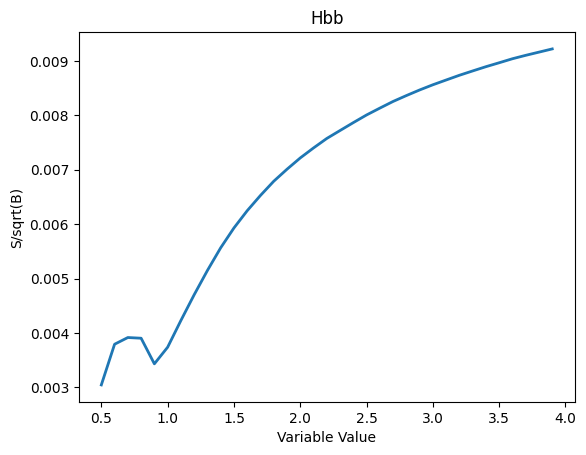

In [115]:
fig, ax = plt.subplots()

#ax.plot(hgg['Color_Ring'].to_numpy()[1][1:]/hgg['Color_Ring'].to_numpy()[1][-1], hgg_s_over_rb_dict_back['Color_Ring'], linewidth=2.0, label='Color Ring')
#ax.plot(hgg_s_over_rb_dict_for['Color_Ring'], linewidth=2.0, label='Color Ring')
ax.plot(hgg['Color_Ring'].project('Color_Ring').to_numpy()[1][5:40], hgg_s_over_rb_dict_for['Color_Ring'], linewidth=2.0, label='Color Ring')

plt.xlabel("Variable Value")
plt.ylabel("S/sqrt(B)")
plt.title('Hbb')

In [ ]:
hgg['Color_Ring'][:,4:,:,:]